In [1]:
%matplotlib inline

In [67]:
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import permutation_importance

# 05. Support Vector Machines
### Simple algorithm with a clever trick
* SVM intuition: maximum margin;
* Kernels. "Kernel trick";
* Applications: regression and classification.

In [3]:
print("The kernel is working...")

The kernel is working...


### Some Decision Trees Demos

In [4]:
load_iris().data, load_iris().target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
attributes, labels = load_iris().data, load_iris().target

In [6]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(attributes, labels, test_size = 0.15, stratify = labels)

In [7]:
tree = DecisionTreeClassifier(min_samples_leaf = 5)

In [8]:
tree.fit(attributes_train, labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [9]:
tree.score(attributes_train, labels_train)

0.9921259842519685

In [10]:
tree.score(attributes_test, labels_test)

0.9130434782608695

In [11]:
# This function shows the importances of each feature
tree.feature_importances_

array([0.        , 0.        , 0.06867626, 0.93132374])

In [12]:
tree.feature_importances_.sum()

1.0

In [13]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
permutation_importance(tree, attributes_train, labels_train, n_repeats = 50)["importances_mean"]

array([0.        , 0.        , 0.11574803, 0.55181102])

In [15]:
tree_new = DecisionTreeClassifier(min_samples_leaf = 5)

In [16]:
attributes_train[:, 2:]

array([[6.1, 2.5],
       [5.4, 2.1],
       [5.9, 2.3],
       [4.5, 1.5],
       [1.3, 0.2],
       [1.3, 0.3],
       [3. , 1.1],
       [5. , 1.9],
       [5.8, 1.6],
       [3.9, 1.2],
       [4. , 1.3],
       [4. , 1.2],
       [6.1, 2.3],
       [5.6, 1.8],
       [4.5, 1.5],
       [6. , 1.8],
       [4.4, 1.4],
       [6.6, 2.1],
       [4.8, 1.8],
       [3.5, 1. ],
       [5.7, 2.3],
       [1.3, 0.4],
       [4.1, 1.3],
       [4. , 1.3],
       [5.6, 2.1],
       [4.6, 1.5],
       [4. , 1.3],
       [1.7, 0.4],
       [6. , 2.5],
       [5.9, 2.1],
       [3.5, 1. ],
       [1.5, 0.4],
       [6.4, 2. ],
       [5.1, 1.5],
       [1.5, 0.3],
       [6.3, 1.8],
       [4.3, 1.3],
       [3.9, 1.4],
       [5.1, 2. ],
       [4.4, 1.4],
       [1.4, 0.3],
       [4.7, 1.4],
       [5.8, 2.2],
       [1.3, 0.2],
       [4.7, 1.5],
       [4.3, 1.3],
       [5.6, 2.4],
       [4.8, 1.8],
       [1.4, 0.2],
       [1.3, 0.3],
       [4.9, 1.8],
       [5.6, 2.2],
       [1.4,

In [17]:
tree_new.fit(attributes_train[:, 2:], labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [18]:
tree_new.feature_importances_

array([0.06867626, 0.93132374])

In [19]:
permutation_importance(tree_new, attributes_train[:, 2:], labels_train, n_repeats = 50)["importances_mean"]

array([0.11417323, 0.55811024])

`R Squared Error` - A good metric for linear regressions

`Yellowbrick` - Good library for visualization of model learning curves

### Support Vector Machines

* Extreme(ly easy) case
    * Two linearly separable classes
        * Decision boundary: simple line (plane in many dimensions)
* Goal
    * Choose the line that best separates the classes
    * Maximum margin
    * The math formula for the objective function is a little complex because it involves matrix algebra
* Applications:
    * Mainly for classification
        * `sklearn.svm.SVC, LinearSVC`
    * Regression: `sklearn.svm.SVR`
<img src="images/a.png" />

SVMs are the total opposites of a linear regression. You may ask *"Why?"*. Well, in a LR we are searching for the model, which is the closest to all points (data), but here, we are searching for a maximal gap between the points and the model. 

Imagine that the points are people sick from COVID-19. We want to find the best function so we could walk past them so we are in the furthest possible place from all of the people.

Only the close points (those with yellow) are the important ones when it comes to finding the best function. We call the points `vectors`. So the yellow points are `supporting vectors`.

`Hyperplane` - A plane of more than 3 dimensions.

The formula is kind of hard: $ min_{\omega,b,\zeta} \frac{1}{2} \omega^{T} \omega + C \displaystyle\sum^{n}_{i=1} \zeta_{i}$ subject to $ y_{i}(\omega^{T}\phi(x_{i}) + b) \geq 1 - \zeta_{i}, \zeta_{i} \geq 0, i = 1, ..., n$, where $ \omega $ are the model's parameters, $\omega^{T}\omega$ is a correlation (covariation) matrix, $ C $ makes a regularization, $ \zeta $ is weights. Otherwise said, it gives the first samples values of `+1`, and the others - `-1`.

* Difficult to separate classes $\Rightarrow$ use regularization
    * C - pentalify for misclassification (L2, c = 1/$\lambda$)
        * Smaller value = stricter (more regularization)
* Many classes
    * `scikit-learn` uses the "one-vs-one" approach
        * Trains $\frac{c(c-1)}{2}$ classifiers ($c$ - number of classes)
* Considerations
    * Few datasets are linearly separable
    * High complexity: between $O(m.n^{2})$ and $O(m.n^{3})$
        * $m$ - number of features, $n$ - number of samples
        * Feasible for max ~$10^{5}$ samples
<img src="images/b.png" />

In [20]:
linear_svm = SVC(C = 100, kernel = "linear")

In [21]:
linear_svm.fit(attributes_train, labels_train)

SVC(C=100, kernel='linear')

In [22]:
linear_svm.coef_, linear_svm.intercept_

(array([[-0.04625678,  0.52118702, -1.00304555, -0.46413017],
        [-0.00709866,  0.17889215, -0.53842426, -0.29225592],
        [ 1.11039813,  1.11113243, -4.4427671 , -4.44686324]]),
 array([ 1.4528266 ,  1.50730129, 18.33360175]))

In [23]:
# The points, which are the closest to the boundary
linear_svm.support_vectors_

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.2, 2.2, 4.5, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7]])

The support vectors need a little bit of movement so they can go to the other class, while the other vectors could move a lot and stay in their own class for long enough.

The same logic applies when we try to make a mesh subdivision in blender.

When we move the `C` regularization parameter up or down, we could see, that the model has more support vectors when C is less, and less support vectors when C is more, or otherwise said - it overfits the data sometimes.

In [24]:
linear_svm.score(attributes_train, labels_train)

0.9921259842519685

In [25]:
linear_svm.score(attributes_test, labels_test)

0.8695652173913043

Woah, nice :D

In [26]:
# Nu - Minimal percent support vectors => (Nu = 9%)
len(linear_svm.support_vectors_) / len(attributes_train)

0.10236220472440945

### "Kernel Trick"
* Used when data is not linearly separable
* Algorithm
    * Create non-linear combinations of the features using a mapping function (**kernel**)
        * This projects them to a higher-dimensional space
* Most widely used: **R**adial **B**asis **Funciton** (Gaussian) kernel
    * Hyperparameter $ \gamma $ - needs to be optimized (e.g. via grid search)
<img src="images/c.png" />

In [27]:
X, y = make_circles(n_samples = 500, factor = 0.5, noise = 0.07)

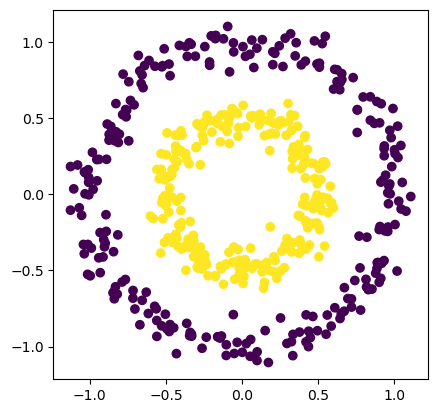

In [28]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.gca().set_aspect("equal")
plt.show()

In [29]:
circles_linear_svm = SVC(C = 1e12, kernel = "linear")

In [30]:
#circles_linear_svm.fit(X, y)

As we can see, it is nearly impossible for the model to find a funciton, which could separate the data. That's why we need to find a way to separate the data so we could make it possible for the model to find that funciton. For example, we could use a paraboloid.

The kernel function helps us to convert the data from 2D to 3D and to find a hyperplane, which could separate the data. After that we could return the data back into two dimensions.

In [38]:
circles_linear_svm = SVC(C = 1000, kernel="linear")

In [39]:
circles_linear_svm.fit(X, y)

SVC(C=1000, kernel='linear')

In [40]:
circles_linear_svm.score(X, y)

0.55

Sometimes it guesses, sometimes it doesn't :D  

In [44]:
# Let's try using a polynomial kernel
circles_poly_svm = SVC(C = 10000, kernel = "poly", degree = 3)

In [45]:
circles_poly_svm.fit(X, y)

SVC(C=10000, kernel='poly')

In [46]:
circles_poly_svm.score(X, y)

0.662

Well, it works better. Not perfect, but better :D

In the example above, though, we used RBF, so let's try it here.

In [51]:
circles_gaussian_svm = SVC(C = 0.06, kernel = "rbf", gamma=0.7)

In [52]:
circles_gaussian_svm.fit(X, y)

SVC(C=0.06, gamma=0.7)

In [53]:
circles_gaussian_svm.score(X, y)

1.0

Overfitted :D We could use the $\gamma$ to make the gaussian distribution wider or more narrow. In SVMs $\gamma$ represents $\sigma$ in gausian distributions, which is the space between the center of the distribution and the two edges.

In the example above we got 100% score, but that's because we used a dataset, which is easiely separatable. Now let's create one, which is harder to separate.

In [60]:
X, y = make_circles(n_samples = 100, factor = 0.5, noise = 0.3)

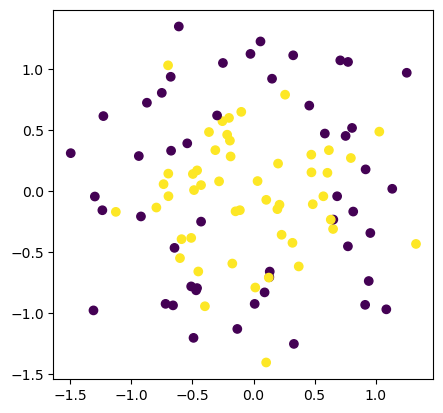

In [61]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.gca().set_aspect("equal")
plt.show()

In [62]:
circles_gaussian_svm = SVC(C = 0.001, kernel = "rbf", gamma = "scale")

In [63]:
circles_gaussian_svm.fit(X, y)

SVC(C=0.001)

In [64]:
circles_gaussian_svm.score(X, y)

0.78

Yes, now it guesses them harder :D

<img src="images/d.png" />

Gausian function: $$ f(x) = ae^{-\frac{(x-b)^{2}}{2c^{2}}} $$

### k-Nearest Neighbors (kNN)
"Lazy learning"
* "Lazy learner"
    * Doesn't learn a fitting function but memorizes the training data
* Algorithm
     * Choose a number k and a distance metric (e.g. Euclidean)
         * This choice provides bias / variance balance
         * **Minkowski distance**: generalized Euclidean distance
    * Find the k nearest neighbors of the current sample
    * Use majority vote to classify
* Advantage: easily adapts to new data
* Downside: computational complexity grows linearly with new samples
    * Efficient implementation: k-d trees

<img src="images/e.png" />

In [66]:
knc = KNeighborsClassifier()

### Anomaly Detection
Using SVMs to find unusual data

### One-Class SVM
* Anomaly / novelty detection
    * Given a dataset **free of outliers**, detect anomalies in new observations
* Outlier detection
    * Given a "polluted" dataset, filter out the outliers
        * We already know about RANSAC - this is one of many methods
* We can use a one-class SVM as an anomaly detector
    * Kernel: usually RBF
    * Parameters:
        * $\gamma$ - kernel coefficient
        * $\nu$ - probability of finding a regular observation far from the others
            * $0 \le \nu \le 1$, 0.5 by default
* Works for outlier detection too, but no on all datasets

We have one class and we check if a point is in it or not.

In [71]:
anomaly_detector = OneClassSVM(nu = 0.05, gamma = 0.2)

In [72]:
anomaly_detector.fit(attributes_train) # No y, so it's unsupervised :D

OneClassSVM(gamma=0.2, nu=0.05)

Every point, that is not under a gaussian "hat" is an outlier, otherwise it's an inlier.

In [73]:
anomaly_detector.predict(attributes_train)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1])

In [74]:
anomaly_detector.predict(attributes_test)

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

* Use a one-class SVM to detect anomalies in the Boston housing dataset
    * Plot the anomalous observations
* \* Optionally, compare different outlier detectors
    * E.g., RANSAV vs. one-class SVM
    * Follow the tutorial in the `scikit-learn` docs
        * Apply it to the Boston data
* Notes
    * Be extremely careful with the testing data
        * It must be properly stratified
    * You'll see that these algorithms don't accept a $y$ parameter
        * Unsupervised learning

There are a lot of classes, that get data, fit it and transform it. These classes are composable. Sometimes there are decisions and turns to be taken. These steps, that are taken to go from the first to the last are called a Pipeline. Once you make a step, you can't turn back.

<img src="images/f.png" />

Date: 05.10.2023